<a href="https://colab.research.google.com/github/yenlung/Deep-Learning-Basics/blob/master/colab02b%20Cooper%20%E7%9C%9F%E7%9A%84%E6%98%AF%E9%A6%AC%E7%88%BE%E6%BF%9F%E6%96%AF%E5%97%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 讀入使用套件

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from urllib.request import urlretrieve

### 2. 檔案設定

In [3]:
urlretrieve("https://raw.githubusercontent.com/yenlung/Deep-Learning-Basics/master/data/imagnet-classes.txt", "imagnet-classes.txt")

cooper=[]
for i in range(1,7):
  urlretrieve(f"https://github.com/yenlung/Deep-Learning-Basics/raw/master/data/cooper/cooper0{i}.jpg", f"cooper0{i}.jpg")
  cooper.append(f"cooper0{i}.jpg")

In [4]:
cooper

['cooper01.jpg',
 'cooper02.jpg',
 'cooper03.jpg',
 'cooper04.jpg',
 'cooper05.jpg',
 'cooper06.jpg']

### 3. 讀入一隻 Cooper 試試

In [5]:
img = load_img(cooper[2], target_size = (224,224))

In [6]:
x = img_to_array(img)

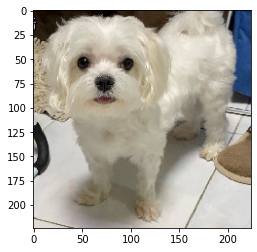

In [7]:
plt.imshow(x/255)

### 4. 讀入 ResNet50 及 labels

In [8]:
resnet = ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [9]:
with open('imagnet-classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [10]:
x = x.reshape(1, 224, 224, 3)

In [11]:
inp = preprocess_input(x)

In [12]:
[k] = np.argmax(resnet.predict(inp), axis=-1)

In [13]:
print(f"ResNet 覺得是 {labels[k]}")

ResNet 覺得是 Maltese dog 馬爾濟斯犬


### 5. 做成 Web App!

In [14]:
!pip install gradio

     |████████████████████████████████| 2.5MB 28.4MB/s 
     |████████████████████████████████| 215kB 44.9MB/s 
     |████████████████████████████████| 1.9MB 44.3MB/s 
     |████████████████████████████████| 962kB 38.7MB/s 
     |████████████████████████████████| 3.2MB 40.1MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=15a467ccd1aa1e4af5188896896e2e37d1847fdb3b75023e113f04d0c3561f62
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=02f9668e90e7c939a4d5207a2c965120a2900cf2ae23735584041a3479e11c9f
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [15]:
import gradio as gr

In [16]:
def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  inp = preprocess_input(inp)
  prediction = resnet.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=3)
sample_images = [[f'cooper0{i}.jpg'] for i in range(1,7)]

gr.Interface(fn=classify_image, inputs=image, outputs=label, 
             examples=sample_images,
             capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://51987.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://51987.gradio.app')